# Parsing DS1000E Rigol Waveforms

**Scott Prahl**

**Feb 2020**

## Introduction

This should apply to DS1052D, DS1052E, DS1102D, and DS1102E Rigol Oscilloscopes.

This file shows results for the DS1052E and DS1102E scopes.


In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

try:
    import RigolWFM.wfme as wfme

except:
    print("***** You need to install the module to read Rigol files first *****")
    print("***** Execute the following line in a new cell, then retry     *****")
    print()
    print("!{sys.executable} -m pip install RigolWFM")

## DS1052E

### Look at a screen shot

Start with a `.wfm` file from a Rigol DS1052E scope.  It should look something like this

<img src="https://github.com/scottprahl/RigolWFM/raw/master/wfm/DS1052E.png" width="70%">

### Look at the data in the `.csv` file

First let's look at plot of the data from the corresponding `.csv` file. 

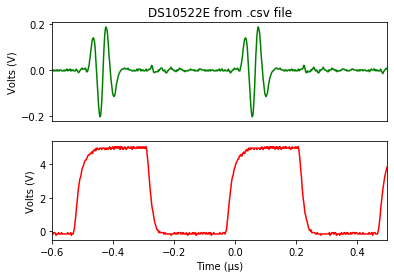

In [2]:
csv_filename = "https://github.com/scottprahl/RigolWFM/raw/master/wfm/DS1052E.csv"

csv_data = np.genfromtxt(csv_filename, delimiter=',', skip_header=2).T

plt.subplot(211)
plt.plot(csv_data[0]*1e6,csv_data[1], color='green')
plt.title("DS10522E from .csv file")
plt.ylabel("Volts (V)")
plt.xlim(-0.6,0.5)
plt.xticks([])

plt.subplot(212)
plt.plot(csv_data[0]*1e6,csv_data[2], color='red')
plt.xlabel("Time (µs)")
plt.ylabel("Volts (V)")
plt.xlim(-0.6,0.5)

plt.show()

In [3]:
# raw=true is needed because this is a binary file
wfm_filename = "https://github.com/scottprahl/RigolWFM/raw/master/wfm/DS1052E.wfm" + "?raw=true"  
channels = wfme.read_and_parse_file(wfm_filename, kind='1000E')

for ch in channels:
    print(ch)

working on https://github.com/scottprahl/RigolWFM/raw/master/wfm/DS1052E.wfm?raw=true
downloading file
Channel 1
    Enabled:   True
    Voltage:
        Scale  = 1 V/div
        Offset = 2 V
    Time:
        Scale  = 100 ns/div
        Delay  = 0 s
        Delta  = 2 ns/point
    Data:
        Points = 8188
        Raw    = [       76,       76,       76  ...        76,       76]
        Volts  = [  -4.04 V,  -4.04 V,  -4.04 V  ...   -4.04 V,  -4.04 V]
        Times  = [      0 s,     2 ns,     4 ns  ... 16.372 µs,16.374 µs]

Channel 2
    Enabled:   True
    Voltage:
        Scale  = 2 V/div
        Offset = -6 V
    Time:
        Scale  = 100 ns/div
        Delay  = 0 s
        Delta  = 2 ns/point
    Data:
        Points = 8188
        Raw    = [      203,      203,      203  ...       138,      138]
        Volts  = [   9.04 V,   9.04 V,   9.04 V  ...    6.44 V,   6.44 V]
        Times  = [      0 s,     2 ns,     4 ns  ... 16.372 µs,16.374 µs]



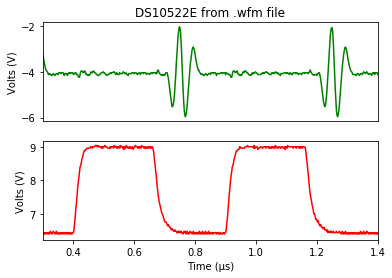

In [4]:
plt.subplot(211)
plt.plot(channels[0].times*1e6,channels[0].volts, color='green')
plt.title("DS10522E from .wfm file")
plt.ylabel("Volts (V)")
plt.xlim(0.3,1.4)
plt.xticks([])

plt.subplot(212)
plt.plot(channels[1].times*1e6,channels[1].volts, color='red')
plt.xlabel("Time (µs)")
plt.ylabel("Volts (V)")
plt.xlim(0.3,1.4)
plt.show()

## DS1102E


First let's have look at the description of the internal file structure. We see that only channel 1 has been enabled.

In [7]:
# raw=true is needed because this is a binary file
wfm_filename = "https://github.com/scottprahl/RigolWFM/raw/master/wfm/DS1102E-B.wfm" + "?raw=true"  
channels = wfme.read_and_parse_file(wfm_filename, kind='1000E')

for ch in channels:
    print(ch)

working on https://github.com/scottprahl/RigolWFM/raw/master/wfm/DS1102E-B.wfm?raw=true
downloading file
Channel 1
    Enabled:   True
    Voltage:
        Scale  = 2 V/div
        Offset = 0 V
    Time:
        Scale  = 1 µs/div
        Delay  = 0 s
        Delta  = 10 ns/point
    Data:
        Points = 16380
        Raw    = [      142,      141,      141  ...        70,       70]
        Volts  = [    1.2 V,   1.12 V,   1.12 V  ...   -4.56 V,  -4.56 V]
        Times  = [      0 s,    10 ns,    20 ns  ... 163.78 µs,163.79 µs]



IndexError: list index out of range

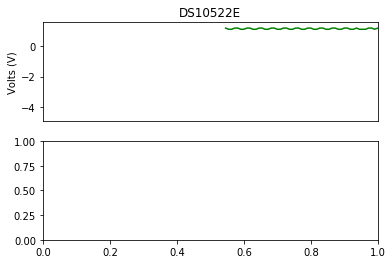

In [8]:
plt.subplot(211)
plt.plot(channels[0].times*1e6,channels[0].volts, color='green')
plt.title("DS10522E")
plt.ylabel("Volts (V)")
plt.xlim(-0.6,0.5)
plt.xticks([])

plt.subplot(212)
plt.plot(channels[1].times*1e6,channels[1].volts, color='green')

plt.xlabel("Time (µs)")
plt.ylabel("Volts (V)")
plt.xlim(-0.6,0.5)

plt.show()

We know that there is a single trace so the following code will work.  The variable `data` will be a list of arrays. Because the data was saved when only one channel was active, the `len(data)` will be 2.  This means that `time = data[0]` and `voltage=data[1]`

In [ ]:
data = wfm.signals(wfm_filename)

t,y = data
plt.plot(t*1e6,y)
plt.xlabel("Time (µs)")
plt.ylabel("Volts (V)")
plt.title("DS1102E with a single trace")
plt.show()

plt.plot(t*1e6,y)
plt.xlabel("Time (µs)")
plt.ylabel("Volts (V)")
plt.xlim(5,6)
plt.title("DS1102E with a single trace")
plt.show()



In [ ]:
csv_filename = "https://github.com/scottprahl/RigolWFM/raw/master/wfm/DS1102E-B.csv"

my_data = np.genfromtxt(csv_filename, delimiter=',', skip_header=2)

plt.plot(my_data.T[0]*1e6,my_data.T[1])
plt.xlabel("Time (µs)")
plt.ylabel("Volts (V)")
plt.title("DS1102E-B with a single trace")
plt.show()



In [ ]:
channels = wfme.read_and_parse_file(wfm_filename, kind='1000E')

plt.plot(channels[0].times*1e6, channels[0].volts)
plt.xlabel("Time (µs)")
plt.ylabel("Volts (V)")
plt.xlim(0,10)
plt.title("DS1102E with a single trace")
plt.show()

## Example of dual trace waveform from URL

In [ ]:
wfm_filename = "https://github.com/scottprahl/RigolWFM/raw/master/wfm/DS1052E.wfm" + "?raw=true"  

x = wfm.describe(wfm_filename)
print(x)

We know that there are two traces so the following code will work

In [ ]:
data = wfm.signals(wfm_filename)

t,y1,y2 = data
plt.plot(t * 1e6, y1)
plt.plot(t * 1e6, y2)

plt.xlabel("Time (µs)")
plt.ylabel("Volts (V)")
plt.title("DS1052E with dual traces")

plt.show()


In [ ]:
### Finally, just zoom in on a bit of the data

plt.plot(t * 1e6, y1)
plt.plot(t * 1e6, y2)

plt.xlabel("Time (µs)")
plt.ylabel("Volts (V)")
plt.title("DS1052E with dual traces")
plt.xlim(-0.1,0.4)
plt.show()

In [ ]:
channels = wfme.read_and_parse_file(wfm_filename, kind='1000E')

plt.plot(channels[0].times*1e6,channels[0].volts)
plt.plot(channels[0].times*1e6,channels[1].volts)

plt.xlabel("Time (µs)")
plt.ylabel("Volts (V)")
plt.xlim(0,0.5)
plt.title("DS1102E with a single trace")
plt.show()

